<a href="https://colab.research.google.com/github/BradJohnson6/STC510/blob/main/module3_basic_and_essential_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Basic Badge**

In [113]:
#importing the necessary packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


In [114]:
#reading the data in a pandas dataframe, not putting the INC number as index column because I'm not positive it's unique although I think it is
crime = pd.read_csv('crimestat (1).csv', engine ='python', on_bad_lines='skip')

In [115]:
#previewing the data to confirm it came in correctly
crime.head()

,INC NUMBER,OCCURRED ON,OCCURRED TO,UCR CRIME CATEGORY,100 BLOCK ADDR,ZIP,PREMISE TYPE
0,201600000052855,11/01/2015 00:00,01/09/2016 00:00,MOTOR VEHICLE THEFT,N 43RD AVE & W CACTUS RD,85029.0,SINGLE FAMILY HOUSE
1,201600000594484,11/01/2015 00:00,NaN,RAPE,13XX E ALMERIA RD,85006.0,SINGLE FAMILY HOUSE
2,201500002102327,11/01/2015 00:00,11/01/2015 09:00,LARCENY-THEFT,51XX N 15TH ST,85014.0,APARTMENT
3,201500002101405,11/01/2015 00:00,11/01/2015 05:00,MOTOR VEHICLE THEFT,102XX W MEDLOCK AVE,85307.0,SINGLE FAMILY HOUSE
4,201500002102668,11/01/2015 00:00,11/01/2015 11:50,MOTOR VEHICLE THEFT,69XX W WOOD ST,85043.0,SINGLE FAMILY HOUSE


In [116]:
#renaming a column to make it easier to work with
crime = crime.rename(columns={'UCR CRIME CATEGORY':'UCR_CRIME_CATEGORY', 'PREMISE TYPE': 'PREMISE_TYPE'})

In [117]:
#viewing the info of the dataframe, we can see that some of the columns contain NA's, however this should not be an issue if we group based on zip code to see where the crime is happening
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131676 entries, 0 to 131675
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   INC NUMBER          131676 non-null  object 
 1   OCCURRED ON         131360 non-null  object 
 2   OCCURRED TO         93174 non-null   object 
 3   UCR_CRIME_CATEGORY  131676 non-null  object 
 4   100 BLOCK ADDR      131676 non-null  object 
 5   ZIP                 131673 non-null  float64
 6   PREMISE_TYPE        130919 non-null  object 
dtypes: float64(1), object(6)
memory usage: 7.0+ MB


In [118]:
#here we have grouped all the crimes based on their area codes so we can see where the most/least amount of crime occurs in the Phoenix area
pd.set_option('display.max_rows', None)
crime.ZIP.value_counts()

85015.0    6963
85008.0    6320
85009.0    5513
85041.0    5477
85051.0    5389
85017.0    5355
85035.0    4752
85043.0    4331
85032.0    4301
85033.0    4258
85021.0    4256
85029.0    4121
85023.0    3927
85016.0    3795
85040.0    3778
85042.0    3580
85022.0    3573
85019.0    3071
85037.0    3005
85031.0    2993
85027.0    2897
85020.0    2839
85013.0    2823
85018.0    2663
85006.0    2661
85034.0    2649
85339.0    2494
85014.0    2275
85053.0    2036
85007.0    2000
85044.0    1928
85004.0    1650
85003.0    1513
85254.0    1435
85353.0    1348
85308.0    1079
85050.0    1047
85024.0     928
85085.0     909
85048.0     858
85012.0     826
85028.0     745
85054.0     508
85306.0     466
85310.0     371
85086.0     362
85083.0     333
85304.0     300
85331.0     287
85307.0     211
85087.0      85
85045.0      72
85251.0      53
85255.0      43
85253.0      42
85301.0      39
85302.0      15
85303.0      13
85323.0       8
85260.0       8
85392.0       8
85282.0       6
85202.0 

In [119]:
#creating a dataframe out of the value counts
agg = crime.ZIP.value_counts().rename_axis("ZIP").reset_index(name="Total_Crime")
agg

,ZIP,Total_Crime
0,85015.0,6963
1,85008.0,6320
2,85009.0,5513
3,85041.0,5477
4,85051.0,5389
5,85017.0,5355
6,85035.0,4752
7,85043.0,4331
8,85032.0,4301
9,85033.0,4258


In [120]:
#grouping crime by Zip code
zipagg = crime.groupby('ZIP')
zipagg.head()

,INC NUMBER,OCCURRED ON,OCCURRED TO,UCR_CRIME_CATEGORY,100 BLOCK ADDR,ZIP,PREMISE_TYPE
0,201600000052855,11/01/2015 00:00,01/09/2016 00:00,MOTOR VEHICLE THEFT,N 43RD AVE & W CACTUS RD,85029.0,SINGLE FAMILY HOUSE
1,201600000594484,11/01/2015 00:00,NaN,RAPE,13XX E ALMERIA RD,85006.0,SINGLE FAMILY HOUSE
2,201500002102327,11/01/2015 00:00,11/01/2015 09:00,LARCENY-THEFT,51XX N 15TH ST,85014.0,APARTMENT
3,201500002101405,11/01/2015 00:00,11/01/2015 05:00,MOTOR VEHICLE THEFT,102XX W MEDLOCK AVE,85307.0,SINGLE FAMILY HOUSE
4,201500002102668,11/01/2015 00:00,11/01/2015 11:50,MOTOR VEHICLE THEFT,69XX W WOOD ST,85043.0,SINGLE FAMILY HOUSE
5,201600000527709,11/01/2015 00:00,03/22/2016 00:36,LARCENY-THEFT,33XX W CAMELBACK RD,85017.0,PARKING LOT
6,201700001722914,11/01/2015 00:00,NaN,LARCENY-THEFT,279XX N 23RD LN,85085.0,SINGLE FAMILY HOUSE
7,201700001603695,11/01/2015 00:00,03/31/2016 00:00,RAPE,38XX W CAMELBACK RD,85019.0,HOSPITAL
8,201500002168686,11/01/2015 00:00,11/11/2015 09:30,LARCENY-THEFT,14XX E HIGHLAND AVE,85014.0,PARKING LOT
9,201500002103724,11/01/2015 00:00,11/01/2015 15:21,DRUG OFFENSE,54XX W INDIAN SCHOOL RD,85031.0,APARTMENT


In [121]:
#getting the type of crime that is occuring at each zip code
zipagg.UCR_CRIME_CATEGORY.value_counts()

ZIP      UCR_CRIME_CATEGORY                   
85003.0  LARCENY-THEFT                             758
         DRUG OFFENSE                              194
         BURGLARY                                  179
         MOTOR VEHICLE THEFT                       128
         AGGRAVATED ASSAULT                        120
         ROBBERY                                    78
         RAPE                                       47
         ARSON                                       7
         MURDER AND NON-NEGLIGENT MANSLAUGHTER       2
85004.0  LARCENY-THEFT                            1007
         BURGLARY                                  142
         MOTOR VEHICLE THEFT                       126
         AGGRAVATED ASSAULT                        119
         DRUG OFFENSE                              114
         ROBBERY                                    96
         RAPE                                       37
         MURDER AND NON-NEGLIGENT MANSLAUGHTER       5
         ARSON    

In [122]:
#viewing where crimes are taking place based on the premise type
zipagg.PREMISE_TYPE.value_counts()

ZIP      PREMISE_TYPE                        
85003.0  STREET / ROADWAY / ALLEY / SIDEWALK      239
         APARTMENT                                199
         SINGLE FAMILY HOUSE                      120
         PARKING LOT                              118
         CONVENIENCE MARKET / STORE                76
         PARK / PLAYGROUND                         73
         VEHICLE                                   66
         GOVERNMENT / PUBLIC BUILDING              55
         OFFICE / COMMERCIAL BUILDING              47
         RETAIL BUSINESS                           43
         RESTAURANT                                39
         DRUG STORE                                38
         OTHER                                     29
         PARKING GARAGE                            29
         BAR / LOUNG / NIGHT CLUB                  25
         BUS STATION                               23
         JAIL / PRISON / PENITENTIARY              20
         FENCED COMMERCIAL YARD     

In [123]:
#creating a new dataframe grouping by crime category
crimetype = crime.groupby(['UCR_CRIME_CATEGORY'])
crimetype

**Essentials**

In [124]:
#median household income taken from https://simplemaps.com/city/phoenix/zips/income-household-median and put into a csv

In [125]:
#reading in adn previewing the income csv
income = pd.read_csv('median_income.csv')
income.head()

,ZIP,Median_Income
0,85003,44140
1,85004,41951
2,85006,38121
3,85007,34667
4,85008,43574


In [126]:
#converting the ZIP's into floats to match the previous dataframe 
income['ZIP'] = income['ZIP'].astype(float)
income

,ZIP,Median_Income
0,85003.0,44140
1,85004.0,41951
2,85006.0,38121
3,85007.0,34667
4,85008.0,43574
5,85009.0,32893
6,85012.0,70228
7,85013.0,56402
8,85014.0,53551
9,85015.0,38019


In [127]:
#Joining the two dataframes to create a data frame with ZIP code median house income and total crime for that zip code
crime_income = income.merge(right= agg, on='ZIP' )
crime_income

,ZIP,Median_Income,Total_Crime
0,85003.0,44140,1513
1,85004.0,41951,1650
2,85006.0,38121,2661
3,85007.0,34667,2000
4,85008.0,43574,6320
5,85009.0,32893,5513
6,85012.0,70228,826
7,85013.0,56402,2823
8,85014.0,53551,2275
9,85015.0,38019,6963


In [128]:
#exporting the dataframe to a csv
crime_income.to_csv('crime income.csv', index=False)

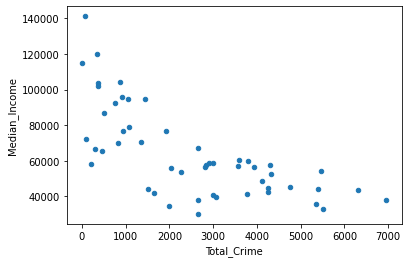

In [129]:
#scatter plot showing the income along with the crime rates for each zip code, as you can see there is a strong inverse relationship with income and crime rates
crime_income.plot(x="Total_Crime", y="Median_Income", kind="scatter",)


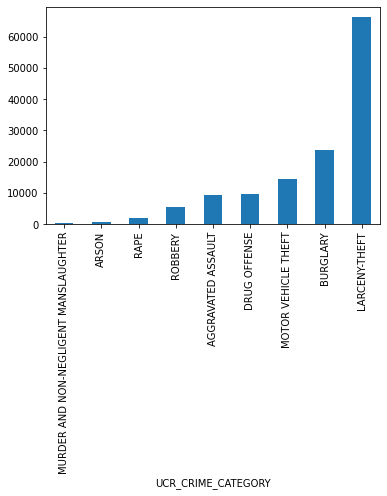

In [130]:
#creating a bargraph showing the number of each crime across the Phoenix metro area
crimetype.ZIP.count().sort_values().plot.bar()